In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [3]:
# Load the dataset
data = pd.read_csv('twitter_entity_sentiment.csv')

In [4]:
data.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [5]:
data.shape

(999, 4)

In [6]:
# Giving Columns names

In [7]:
column_names=['id','entity','sentiments_given','text']

In [8]:
data = pd.read_csv('twitter_entity_sentiment.csv',names=column_names)

In [9]:
data.head()

,id,entity,sentiments_given,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [10]:
data.describe

<bound method NDFrame.describe of        id               entity sentiments_given  \
0    3364             Facebook       Irrelevant   
1     352               Amazon          Neutral   
2    8312            Microsoft         Negative   
3    4371                CS-GO         Negative   
4    4433               Google          Neutral   
..    ...                  ...              ...   
995  4891  GrandTheftAuto(GTA)       Irrelevant   
996  4359                CS-GO       Irrelevant   
997  2652          Borderlands         Positive   
998  8069            Microsoft         Positive   
999  6960      johnson&johnson          Neutral   

                                                  text  
0    I mentioned on Facebook that I was struggling ...  
1    BBC News - Amazon boss Jeff Bezos rejects clai...  
2    @Microsoft Why do I pay for WORD when it funct...  
3    CSGO matchmaking is so full of closet hacking,...  
4    Now the President is slapping Americans in the...  
..         

In [11]:
# Counting the number of missing values
data.isnull().sum()

id                  0
entity              0
sentiments_given    0
text                0
dtype: int64

In [12]:
#Checking the distribution of sentiments column

In [13]:
data['sentiments_given'].value_counts()

sentiments_given
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64

In [14]:
# Perform sentiment analysis
def analyze_sentiment(text):
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [15]:
data['Sentiment_found'] = data['text'].apply(analyze_sentiment)

In [16]:
data.head()

,id,entity,sentiments_given,text,Sentiment_found
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,negative
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,neutral
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,negative
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",negative
4,4433,Google,Neutral,Now the President is slapping Americans in the...,positive


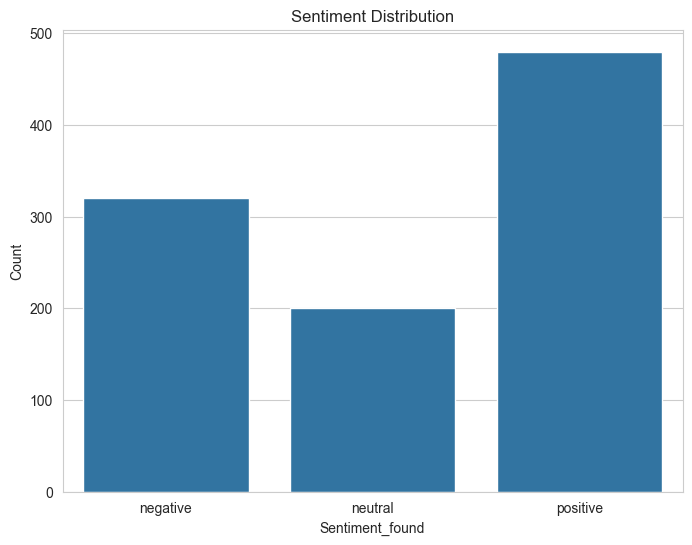

In [17]:
# Visualize sentiment distribution
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment_found', data=data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment_found')
plt.ylabel('Count')
plt.show()